<a href="https://colab.research.google.com/github/Stonetenth2005/Machine-Learning/blob/main/Standardisation/Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)

## Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# fitting the train data in standard scaler, it will learn its parameters
sc.fit(X_train)

# transforming training data from test datasets
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

X_train_scaled # returns a numpy array

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [ ]:
# transforming both to dataframes from numpy arrays

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [ ]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [ ]:
np.round(X_train_scaled.describe(), 1) # mean becomes 0 and standard deviation becomes 1

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


<Axes: >

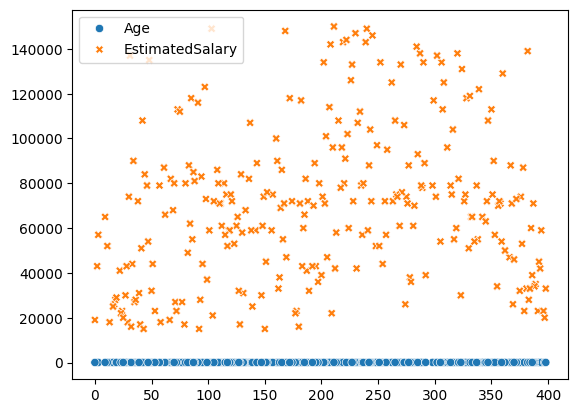

In [ ]:
sns.scatterplot(X_train) # salary is too high for age to be compared with it

<Axes: >

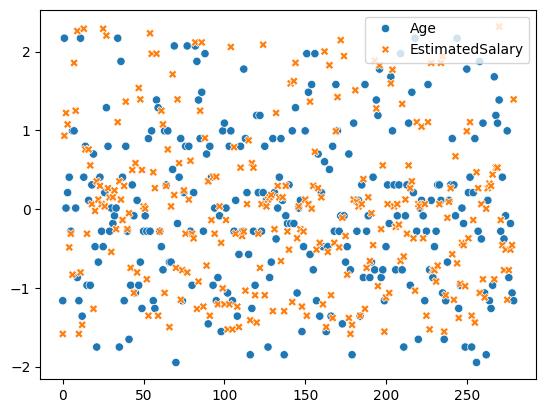

In [ ]:
sns.scatterplot(X_train_scaled) # age and salary now become comparable

<Axes: ylabel='Density'>

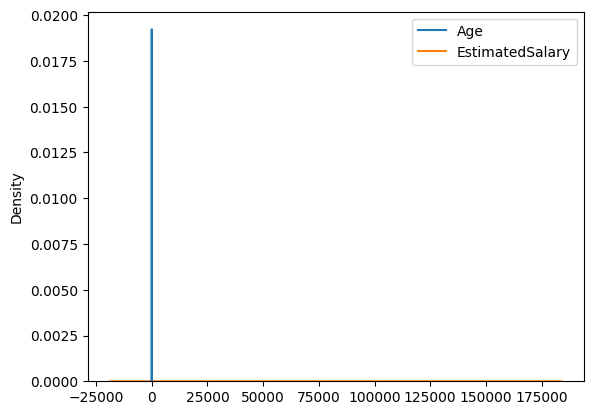

In [ ]:
sns.kdeplot(X_train) # incomparable features

<Axes: ylabel='Density'>

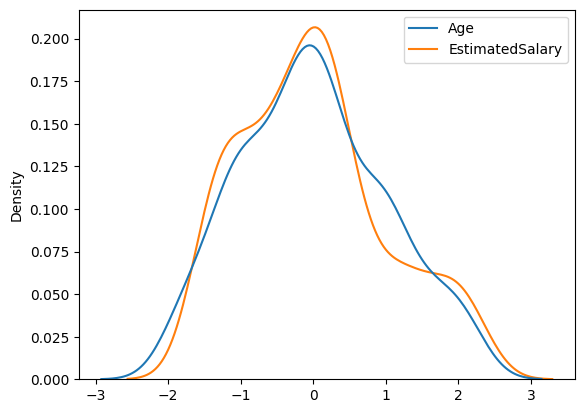

In [ ]:
sns.kdeplot(X_train_scaled) # now comparable

# Effect of Outlier

In [ ]:
# Adding some outliers

outliers = pd.DataFrame({'Age' : [5, 90, 95], 'EstimatedSalary' : [1000, 25000, 350000], 'Purchased' : [0, 1, 1]})

df = pd.concat([outliers, df], ignore_index=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# fitting the train data in standard scaler, it will learn its parameters
sc.fit(X_train)

# transforming training data from test datasets
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

X_train_scaled # returns a numpy array

array([[-2.67075169e-01, -5.74529512e-01],
       [ 9.91173956e-01, -9.05746825e-02],
       [ 7.21549143e-01,  1.30751705e+00],
       [-1.16582454e+00,  2.85834630e-01],
       [ 7.21549143e-01,  3.66493768e-01],
       [ 2.72174456e-01,  7.07435941e-02],
       [-2.67075169e-01, -4.93870374e-01],
       [ 3.62049394e-01, -3.86324856e-01],
       [ 1.82299519e-01,  7.07435941e-02],
       [ 3.62049394e-01,  4.38572147e-02],
       [ 2.72174456e-01,  9.76299735e-02],
       [ 2.72174456e-01,  3.12721009e-01],
       [-5.36699981e-01,  1.38817619e+00],
       [ 3.62049394e-01,  9.57994115e-01],
       [-8.06324794e-01,  2.14099481e+00],
       [-2.67075169e-01,  1.24516353e-01],
       [ 9.91173956e-01, -1.08537072e+00],
       [-1.70507417e+00,  4.38572147e-02],
       [ 2.72174456e-01,  9.76299735e-02],
       [-1.79494911e+00,  3.66493768e-01],
       [ 2.54964362e-03, -4.93870374e-01],
       [ 1.62029852e+00,  9.57994115e-01],
       [ 8.11424081e-01, -1.03159796e+00],
       [-8.

In [ ]:
# transforming both to dataframes from numpy arrays

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

<Axes: >

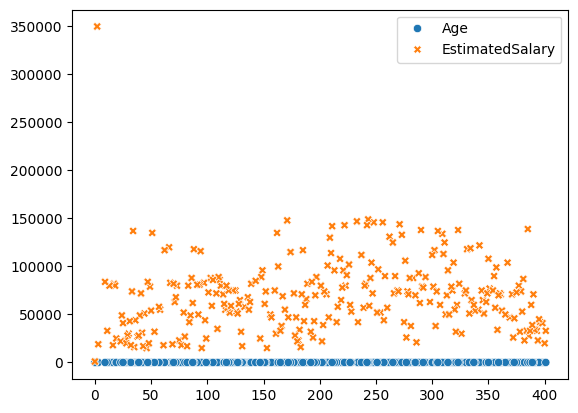

In [ ]:
sns.scatterplot(X_train) # salary is too high for age to be compared with it, but with outliers

<Axes: >

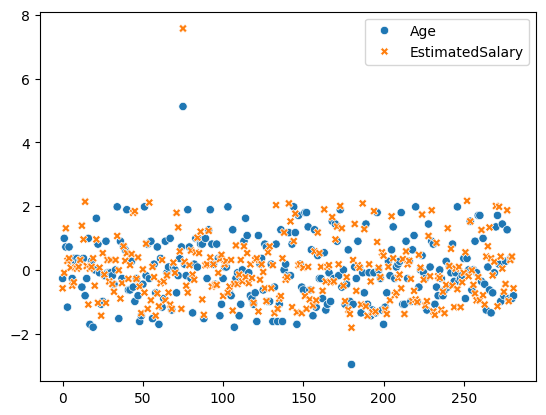

In [ ]:
sns.scatterplot(X_train_scaled) # age and salary now become comparable, but outliers still exist !!

Observation - Scaling doesn't help in reducing the effect of outliers, and hence they are needed to be explicitly removed.